In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [29]:
df = pd.read_csv("./data/04_19_2018_04_15_2023_energy_generation_by_type.csv")
df['datetime_beginning_utc'] = pd.to_datetime(df['datetime_beginning_utc'])

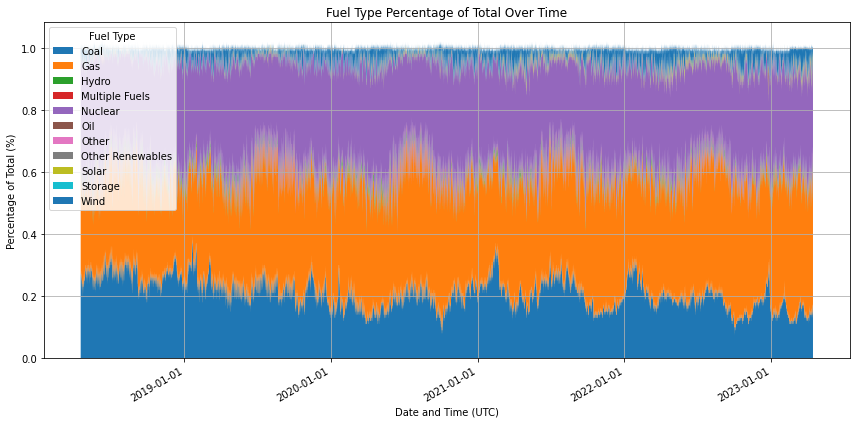

In [30]:
df_pivot = df.pivot(index='datetime_beginning_utc', columns='fuel_type', values='fuel_percentage_of_total').fillna(0)

plt.figure(figsize=(12, 6))

fuel_types = df_pivot.columns.tolist()
plt.stackplot(df_pivot.index, *[df_pivot[fuel] for fuel in fuel_types], labels=fuel_types)

plt.title('Fuel Type Percentage of Total Over Time')
plt.xlabel('Date and Time (UTC)')
plt.ylabel('Percentage of Total (%)')
plt.legend(title='Fuel Type', loc='upper left')
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

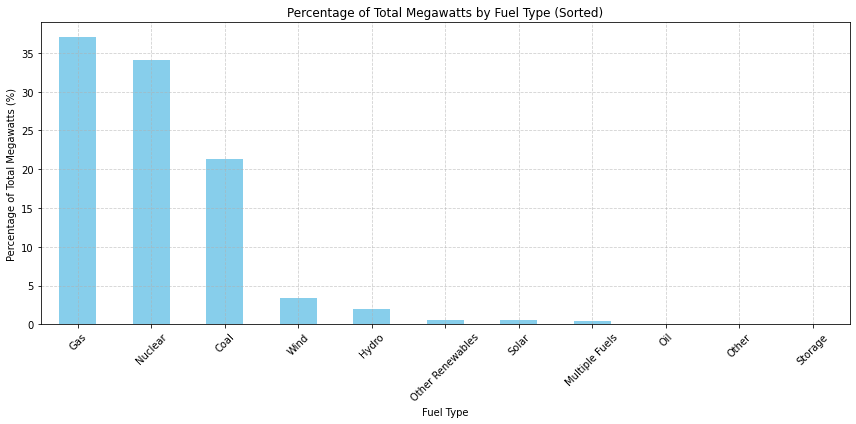

In [31]:
total_fuel_percentage_by_type = df.groupby('fuel_type')['fuel_percentage_of_total']
average_fuel_percentage_by_type = total_fuel_percentage_by_type.mean().sort_values(ascending=False) * 100

plt.figure(figsize=(12, 6))
average_fuel_percentage_by_type.plot(kind='bar', color='skyblue')
plt.title('Percentage of Total Megawatts by Fuel Type (Sorted)')
plt.xlabel('Fuel Type')
plt.ylabel('Percentage of Total Megawatts (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Seasonal Energy Usage

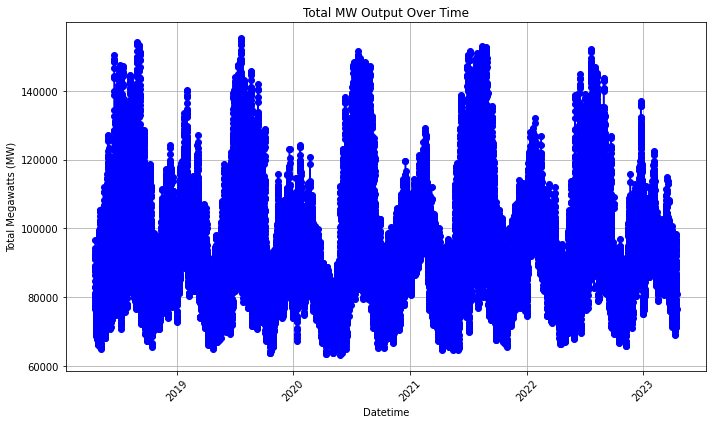

In [32]:
total_mw_over_time = df.groupby('datetime_beginning_utc')['mw'].sum()
plt.figure(figsize=(10, 6))
plt.plot(total_mw_over_time, marker='o', linestyle='-', color='b')
plt.title('Total MW Output Over Time')
plt.xlabel('Datetime')
plt.ylabel('Total Megawatts (MW)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gas Energy Trends

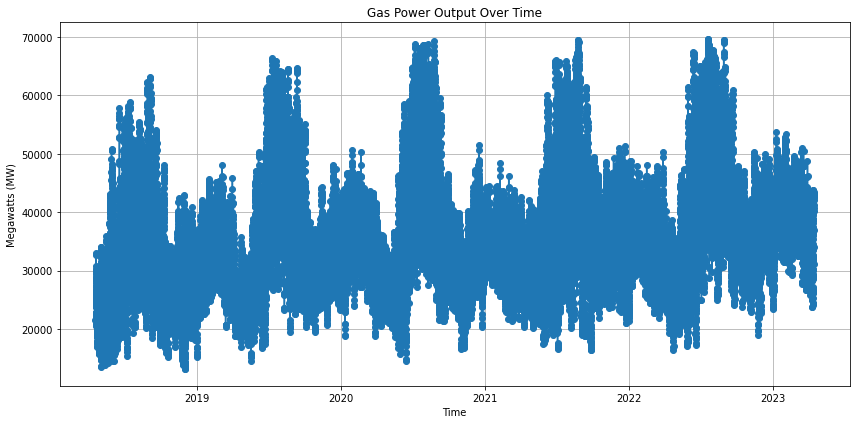

In [33]:
gas_data = df[df['fuel_type'] == 'Gas']

plt.figure(figsize=(12, 6))
plt.plot(gas_data['datetime_beginning_utc'], gas_data['mw'], marker='o', linestyle='-')
plt.title('Gas Power Output Over Time')
plt.xlabel('Time')
plt.ylabel('Megawatts (MW)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Wind Energy Trends

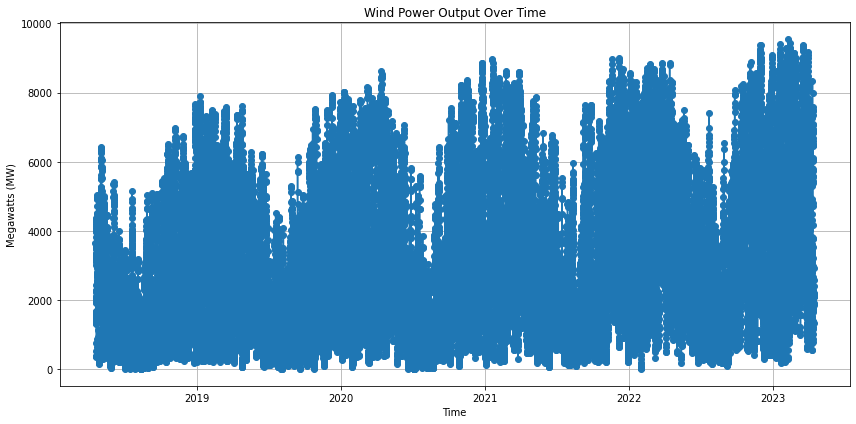

In [34]:
wind_data = df[df['fuel_type'] == 'Wind']

plt.figure(figsize=(12, 6))
plt.plot(wind_data['datetime_beginning_utc'], wind_data['mw'], marker='o', linestyle='-')
plt.title('Wind Power Output Over Time')
plt.xlabel('Time')
plt.ylabel('Megawatts (MW)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Solar Energy Trends

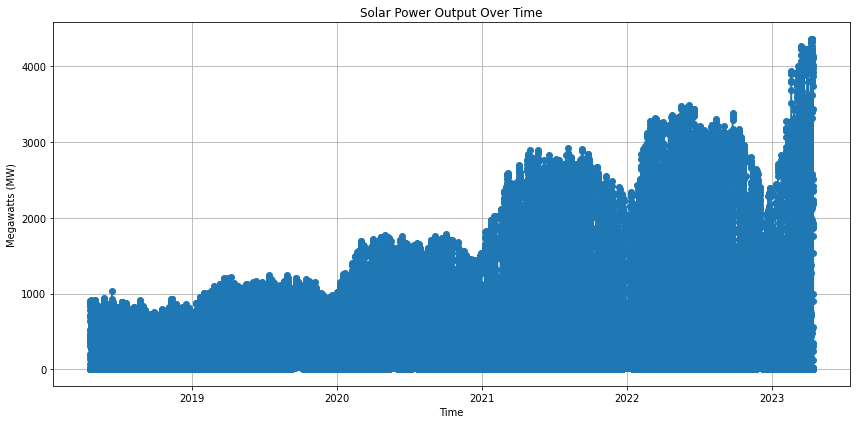

In [35]:
solar_data = df[df['fuel_type'] == 'Solar']

plt.figure(figsize=(12, 6))
plt.plot(wind_data['datetime_beginning_utc'], solar_data['mw'], marker='o', linestyle='-')
plt.title('Solar Power Output Over Time')
plt.xlabel('Time')
plt.ylabel('Megawatts (MW)')
plt.grid(True)
plt.tight_layout()
plt.show()